# Segment shopping customers

**Problem statement:** Understand the target customers for the marketing team to plan a strategy.

- Find the ideal number of groups.
- I dentify the most important shopping groups based on income, age and the mall shopping score.

**Objective**
- Divide your mall target into approachable groups.
- Create subsets of a market based on demographics behavioral criteria to better understand the target for marketing activities.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading dataset
df=pd.read_csv("C:\\Users\\pc\\OneDrive\\Documents\\alphaeus_private\\Study\\Study\\Data Analyst\\extra_datasets\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h3> Univariate Analysis

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [28]:
# define numeric columns 
cols= ['Age', 'Annual Income (k$)','Spending Score (1-100)']

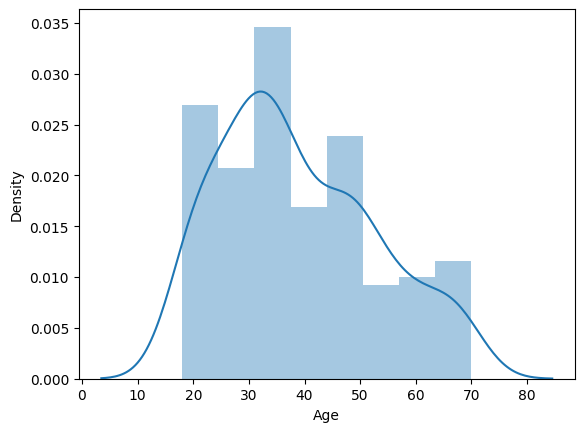

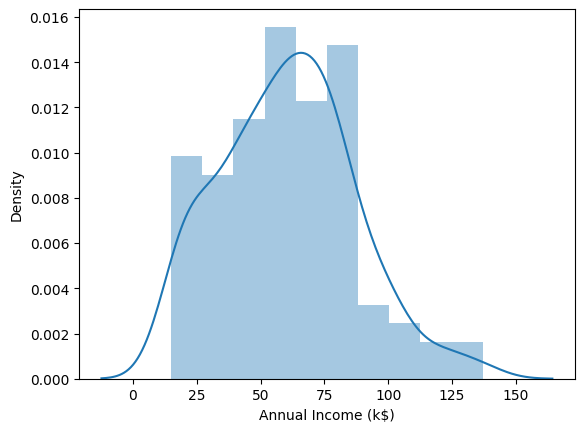

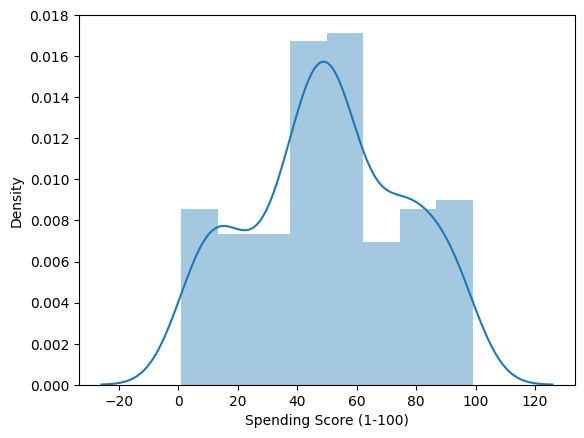

In [11]:
# visualizing distribution of the numerical columns.
for i in cols:
    plt.figure()
    sns.distplot(df[i])

<Figure size 640x480 with 0 Axes>

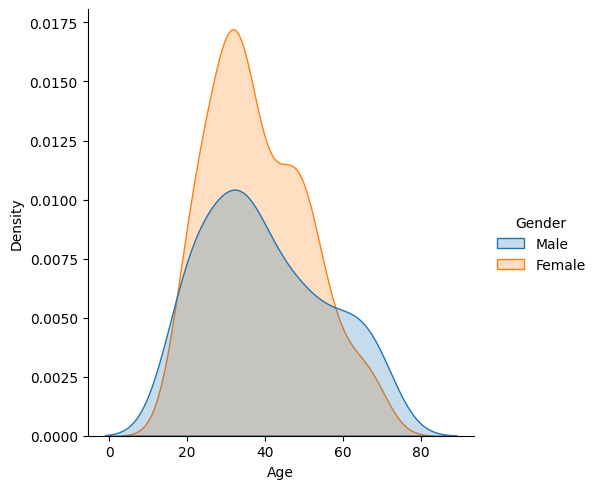

<Figure size 640x480 with 0 Axes>

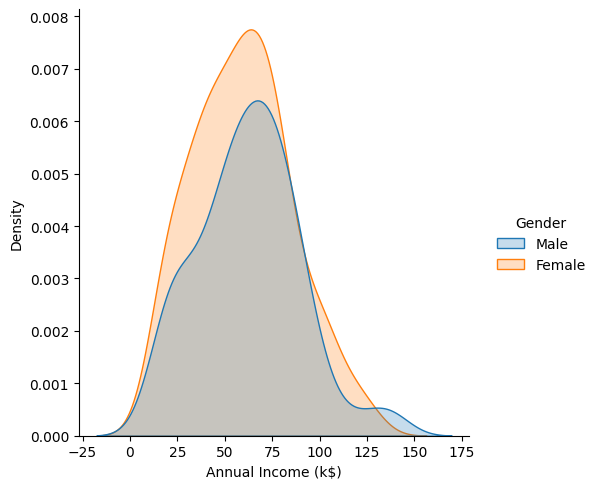

<Figure size 640x480 with 0 Axes>

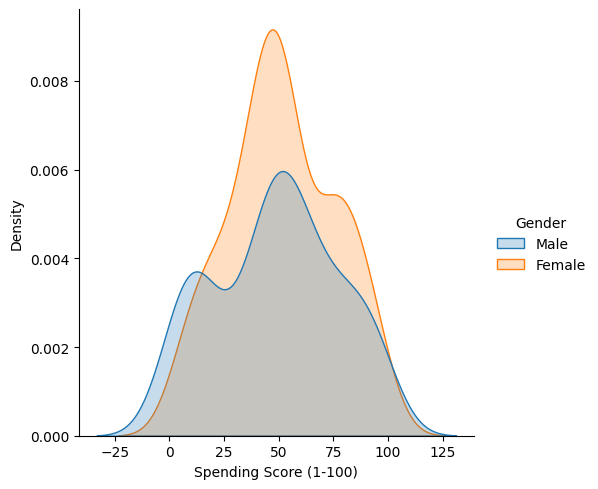

In [25]:
# Distribution by gender
for i in cols:
    plt.figure()
    sns.displot(x=i,fill=True,hue=df['Gender'], kind="kde", data=df);

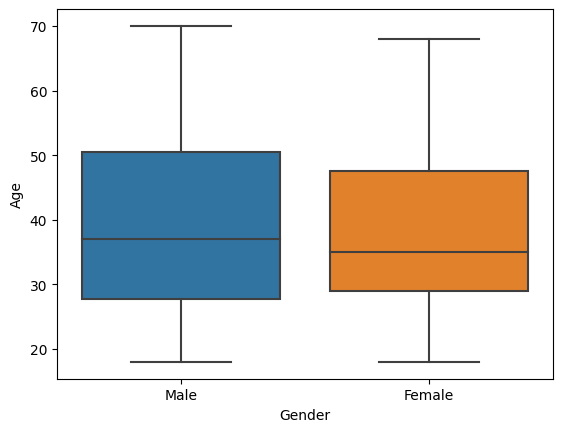

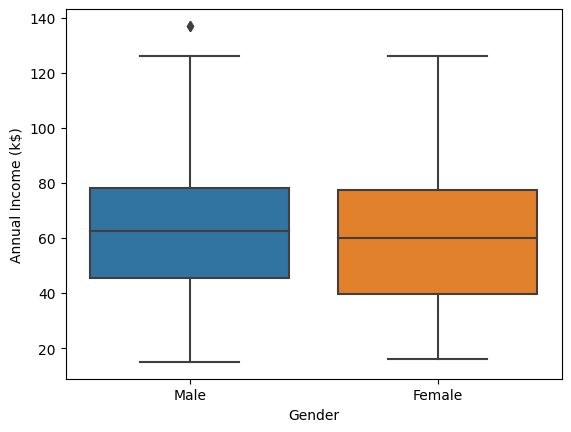

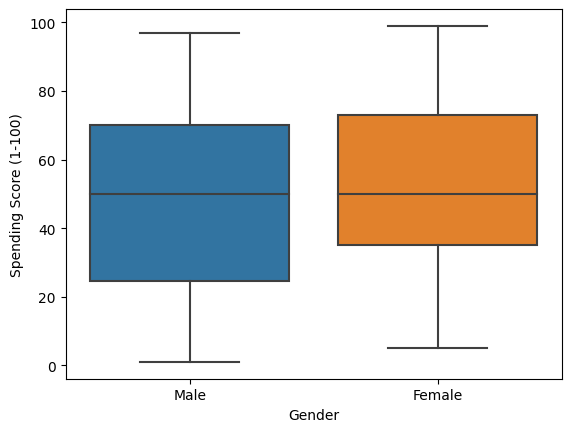

In [26]:
# Visualizing categorical columns
for i in cols:
    plt.figure()
    sns.boxplot(x='Gender',y=df[i], data=df)

In [27]:
# Distribution by gender
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<h3> Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

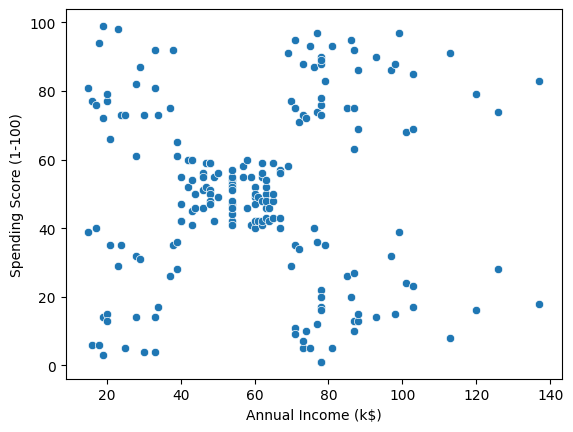

In [30]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=df)

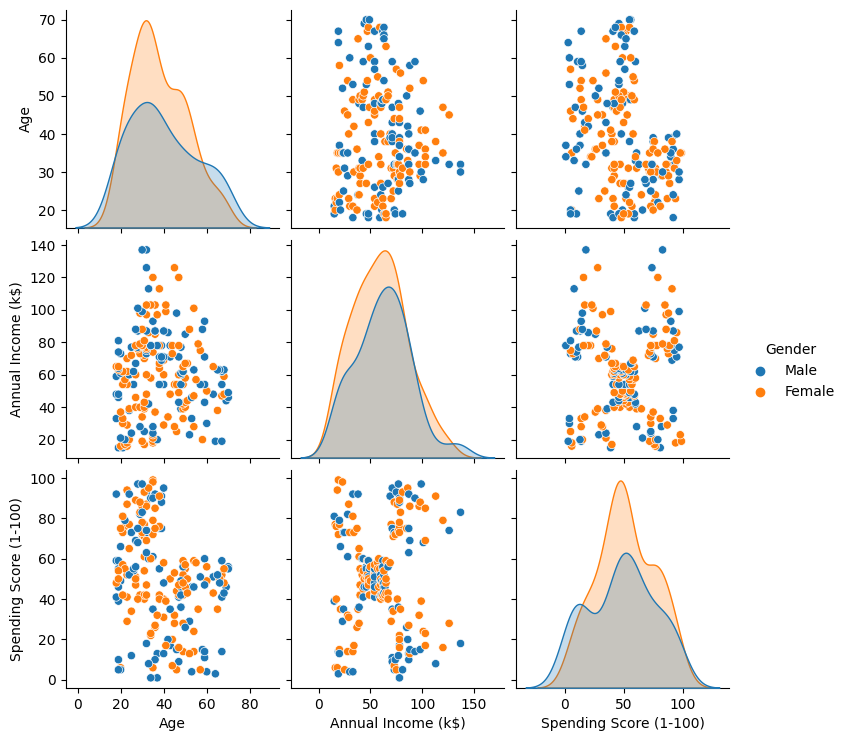

In [39]:
# df=df.drop(columns=['CustomerID'],axis=1)
sns.pairplot(df, hue='Gender');

In [40]:
# Mean values of our data based on gender
df.groupby(['Gender'])[['Age','Annual Income (k$)',
                       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

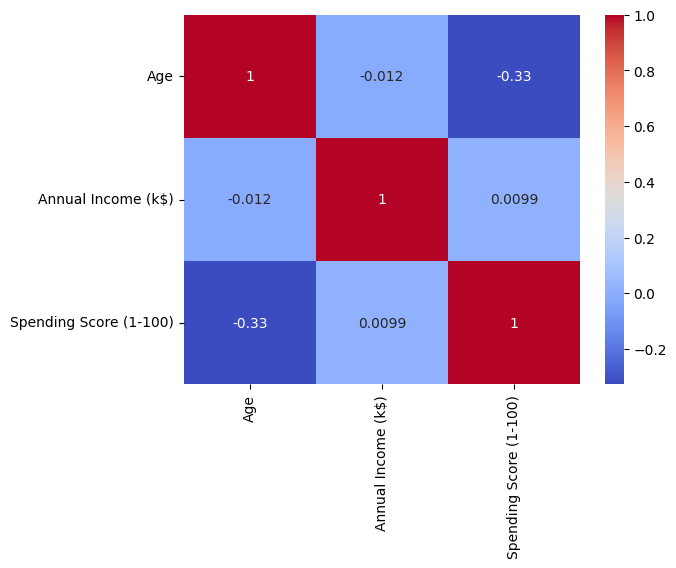

In [43]:
# correlation
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm');

<h3> Clustering -Univariate, Bivariate, Multivariate

Univariate clustering

In [50]:
# initiate our algorithim
clustering1=KMeans(n_clusters=5)

In [51]:
# fit the algorithim
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=5)

In [52]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [53]:
# add clustering labels to our dataframe
df['Income Cluster']= clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [54]:
# How many customers fall under each cluster
df['Income Cluster'].value_counts()

Income Cluster
0    56
4    50
2    42
1    32
3    20
Name: count, dtype: int64

Determining the ideal number of clusters to use from data

In [57]:
# inertia_scores for a range 1-11
inertial_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertial_scores.append(kmeans.inertia_)
    

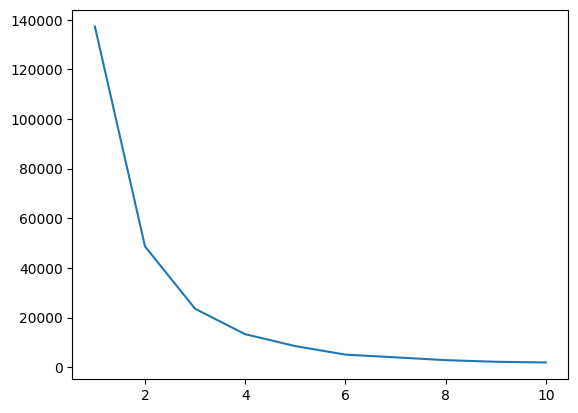

In [59]:
# Pairing scores with the range and ploting
plt.plot(range(1,11),inertial_scores);

we can use three as number of clusters

In [62]:
# initiate our algorithim
clustering1=KMeans(n_clusters=3)

# fit the algorithim
clustering1.fit(df[['Annual Income (k$)']])

# add clustering labels to our dataframe
df['Income Cluster']= clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


Analysis

In [63]:
# mean value for our clusters
df.groupby(['Income Cluster'])[['Age','Annual Income (k$)',
                                'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


Bivariate clustering

In [65]:
# initiate algorithim
clustering2= KMeans()

# fit the algorithim
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

# add clustering labels to our dataframe
df['spend_income_Cluster']= clustering2.labels_
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,spend_income_Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4


Optimize our cluster2

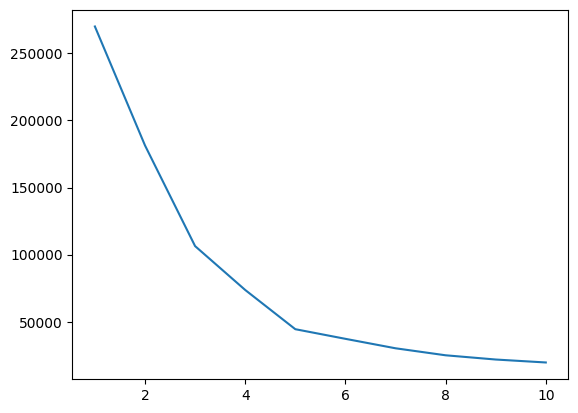

In [68]:
# inertia_scores for a range 1-11
inertial_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertial_scores2.append(kmeans2.inertia_)

# Pairing scores with the range and ploting
plt.plot(range(1,11),inertial_scores2);

In [69]:
# initiate algorithim
clustering2= KMeans(n_clusters=5)

# fit the algorithim
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

# add clustering labels to our dataframe
df['spend_income_Cluster']= clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,spend_income_Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4


visualize

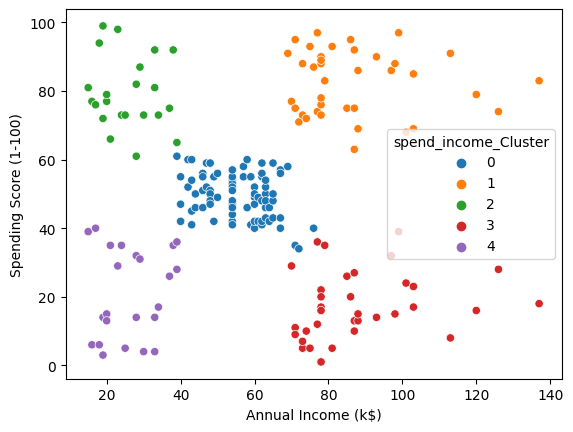

In [77]:
sns.scatterplot(data=df, x='Annual Income (k$)',
                y='Spending Score (1-100)', hue='spend_income_Cluster',palette='tab10');

In [76]:
# getting centroids for the clusters
centers= clustering2.cluster_centers_
print(centers)

# converting centers to a dataframe
centers=pd.DataFrame(centers)
# renaming columns
centers.columns=['x','y']

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


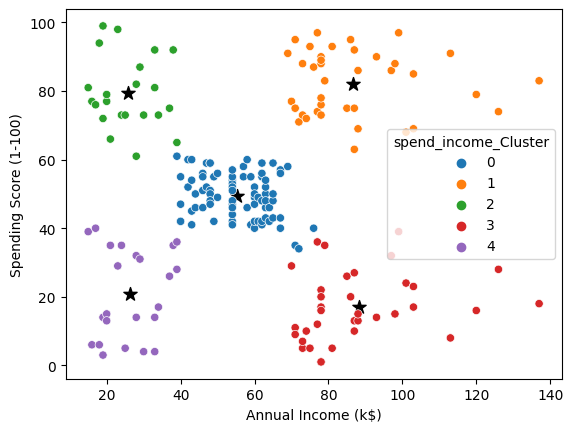

In [78]:
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)',
                y='Spending Score (1-100)', hue='spend_income_Cluster',palette='tab10');